# Group By Lab

### Introduction

In this lesson, we'll continue our exploration of the FEMA dataset.  This time we'll do so using the group by and pivot functions.

### Loading our Data

Let's begin by loading our data.

In [3]:
import pandas as pd

df_claims = pd.read_csv('./formatted_claims_county.txt', sep='\t')

In [4]:
df_claims[:3]

,state,county,total_loss,closed_loss,open_loss,cwop_loss,total_pay
0,ALABAMA,AUTAUGA COUNTY,383,259,11,113,5.406710e+06
1,ALABAMA,BALDWIN COUNTY,17628,14064,10,3554,5.507447e+08
2,ALABAMA,BARBOUR COUNTY,30,17,0,13,6.780529e+05


And let's remove change the formatting of our data away from scientific notation.

In [5]:
pd.options.display.float_format = '{:.2f}'.format

In [6]:
df_claims[:3]

,state,county,total_loss,closed_loss,open_loss,cwop_loss,total_pay
0,ALABAMA,AUTAUGA COUNTY,383,259,11,113,5406709.64
1,ALABAMA,BALDWIN COUNTY,17628,14064,10,3554,550744673.38
2,ALABAMA,BARBOUR COUNTY,30,17,0,13,678052.93


Notice with this dataset, our missing data is removed.

In [8]:
df_claims.isna().sum()

# state          0
# county         0
# total_loss     0
# closed_loss    0
# open_loss      0
# cwop_loss      0
# total_pay      0

state          0
county         0
total_loss     0
closed_loss    0
open_loss      0
cwop_loss      0
total_pay      0
dtype: int64

And let's remove our `total_loss` column.

In [51]:
df_claims_reduced = df_claims.drop('total_loss', axis = 1)

df_claims_reduced.columns
# ['state', 'county', 'closed_loss', 'open_loss', 'cwop_loss',
#      'total_pay']

Index(['state', 'county', 'closed_loss', 'open_loss', 'cwop_loss',
       'total_pay'],
      dtype='object')

### State Level Data

If we would like to get state level data, we'll need to begin by grouping our data by the state, and then calling describe.

In [52]:
state_grouped = df_claims_reduced.groupby('state').describe()

In [54]:
state_grouped[:4]

closed_loss                                                  \
               count   mean     std  min   25%   50%    75%      max   
state                                                                  
ALABAMA        61.00 520.75 2311.04 0.00  7.00 27.00  93.00 14064.00   
ALASKA         15.00  28.00   41.38 0.00  1.50 14.00  42.50   157.00   
ARIZONA        16.00 199.44  388.60 4.00 48.25 92.50 144.25  1624.00   
ARKANSAS       73.00  94.88  167.80 1.00 11.00 45.00 131.00  1137.00   

         open_loss       ... cwop_loss         total_pay              \
             count mean  ...       75%     max     count        mean   
state                    ...                                           
ALABAMA      61.00 0.64  ...     27.00 3554.00     61.00 16771509.61   
ALASKA       15.00 0.20  ...     17.00   70.00     15.00   647465.67   
ARIZONA      16.00 0.19  ...     60.50  741.00     16.00  2970977.92   
ARKANSAS     73.00 1.40  ...     18.00  354.00     73.00  1997601.56   

                                                                           
                 std     min       25%        50%        75%          max  
state                                                                      
ALABAMA  83074427.40    0.00 103893.19  506268.81 1084320.81 550744673.38  
ALASKA     988075.98    0.00  21770.76  313648.21  611153.74   3397281.17  
ARIZONA   5075830.19 5743.11 738360.34 1334990.84 2659236.07  20938615.73  
ARKANSAS  3202172.93 1411.81 127303.92  810870.22 2670217.75  21348257.55  

[4 rows x 32 columns]

From here we can select descriptions of individual columns.  For example, let's select just the grouped description for the closed loss.

In [55]:
closed_loss = state_grouped['closed_loss']

closed_loss[:5]

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
ALABAMA,61.00,520.75,2311.04,0.00,7.00,27.00,93.00,14064.00
ALASKA,15.00,28.00,41.38,0.00,1.50,14.00,42.50,157.00
ARIZONA,16.00,199.44,388.60,4.00,48.25,92.50,144.25,1624.00
ARKANSAS,73.00,94.88,167.80,1.00,11.00,45.00,131.00,1137.00
CALIFORNIA,57.00,561.05,1035.47,1.00,41.00,161.00,571.00,5641.00


Now that we have the closed loss counts of all of the states, let's begin to plot these.

Use pandas to create subplots of the `50%`, `75%` and `max` of each state.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115f4fb50>,
      dtype=object)

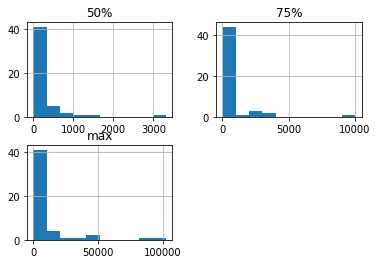

In [56]:
closed_loss[['50%', '75%', 'max']].hist()

So we can see that most states are between 0 and 2000 for 50% percentile of the county, and over 5000 for the 75th percentile, and less than 50,000 for the max claims per county.

Now let's plot the total number of closed loss claims per state, sorted from most to least, and selecting just the top ten states.

[Text(0.5, 1.0, 'total closed loss by state')]

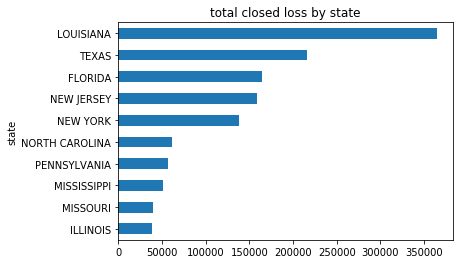

In [57]:
states_by_loss_claims = df_claims.groupby('state').sum()['closed_loss'].sort_values(ascending = False)[:10][::-1].plot(kind = 'barh')

states_by_loss_claims.set(title = 'total closed loss by state')

Now let's try to plot multiple columns simultaneously.

Group by the state and take the sum of the all of the columns, then let's sort the entire dataframe by the sum of the `closed loss` per state, descending.

In [61]:
states_by_loss_claims_all_cols = df_claims_reduced.groupby('state').sum().sort_values(by = 'closed_loss', ascending = False)

In [62]:
states_by_loss_claims_all_cols[:5]

,closed_loss,open_loss,cwop_loss,total_pay
state,,,,
LOUISIANA,364596,701,84847,19444472963.33
TEXAS,216463,254,52546,6897342613.53
FLORIDA,164245,331,91395,4171595996.58
NEW JERSEY,159084,1435,29990,5978027433.87
NEW YORK,137703,503,27366,5350693515.93


Now plot the metrics of these top five states with a separate subplot for each column.  Make the figure large enough so the data isn't squished.  

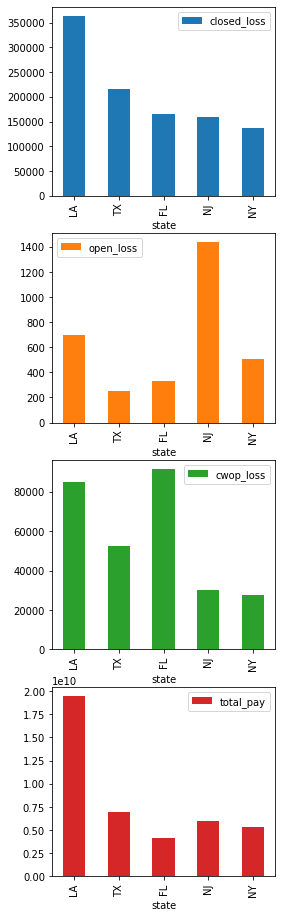

In [77]:
import matplotlib.pyplot as plt


axes = states_by_loss_claims_all_cols[:5].plot(kind = 'bar', subplots = True, sharex = False)
for ax in axes:
    ax.set(xticklabels = ['LA', 'TX', 'FL', 'NJ', 'NY'], title = '')
fig = plt.gcf()
fig.set_size_inches(4, 16)